In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(30,15)})
pd.pandas.set_option("display.max_columns",None)


In [57]:
df = pd.read_csv('C:/Users/himanshu/ml project code/jupyter books/ml_assignment_code/train_u6lujuX_CVtuZ9i (1).csv')
df_copy = df.copy()

In [58]:
df_copy

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [33]:
df_copy.shape

(614, 13)

In [59]:
df_copy.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
num_col = [ i for i in df_copy.columns if df_copy[i].dtypes != 'O']
cat_col = [ i for i in df_copy.columns if df_copy[i].dtypes == 'O']

In [61]:
num_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [62]:
cat_col

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [63]:
df_copy.duplicated().sum()

0

In [64]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_copy[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_copy.columns if feature not in numerical_feature]

In [65]:
categorical_feature

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [66]:
continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [67]:
discrete_feature

['Loan_Amount_Term', 'Credit_History']

In [68]:
for i in categorical_feature:
    print(i)
    print(len(df_copy[i].unique()))
    print(df_copy[i].unique())
    print('*'*20)

Loan_ID
614
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP00

In [69]:
df_copy.drop('Loan_ID',axis=1,inplace=True)

In [70]:
numerical_feature = [feature for feature in df_copy.columns if df_copy[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df_copy[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df_copy.columns if feature not in numerical_feature]

In [71]:
discrete_feature

['Loan_Amount_Term', 'Credit_History']

In [72]:
continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [73]:
for i in categorical_feature:
    print(i)
    print(len(df_copy[i].unique()))
    print(df_copy[i].unique())
    print('*'*20)

Gender
3
['Male' 'Female' nan]
********************
Married
3
['No' 'Yes' nan]
********************
Dependents
5
['0' '1' '2' '3+' nan]
********************
Education
2
['Graduate' 'Not Graduate']
********************
Self_Employed
3
['No' 'Yes' nan]
********************
Property_Area
3
['Urban' 'Rural' 'Semiurban']
********************
Loan_Status
2
['Y' 'N']
********************


In [74]:
df_copy.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [84]:
df_copy['Gender'].fillna(df_copy['Gender'].mode()[0],inplace=True)

In [85]:
df_copy['Married'].fillna(df_copy['Married'].mode()[0],inplace=True)

In [86]:
df_copy['Self_Employed'].fillna(df_copy['Self_Employed'].mode()[0],inplace=True)

In [87]:
df_copy['Dependents'].fillna(df_copy['Dependents'].mode()[0],inplace=True)

In [89]:
df_copy['LoanAmount'].fillna(df_copy['LoanAmount'].median(),inplace=True)

In [90]:
df_copy['Loan_Amount_Term'].fillna(df_copy['LoanAmount'].mode()[0],inplace=True)

In [91]:
df_copy['Credit_History'].fillna(df_copy['Credit_History'].mode()[0],inplace=True)

In [92]:
df_copy.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [93]:
for i in categorical_feature:
    print(i)
    print(len(df_copy[i].unique()))
    print(df_copy[i].unique())
    print('*'*20)

Gender
2
['Male' 'Female']
********************
Married
2
['No' 'Yes']
********************
Dependents
4
['0' '1' '2' '3+']
********************
Education
2
['Graduate' 'Not Graduate']
********************
Self_Employed
2
['No' 'Yes']
********************
Property_Area
3
['Urban' 'Rural' 'Semiurban']
********************
Loan_Status
2
['Y' 'N']
********************


In [96]:
gender_map = {"Male":0,'Female':1}
married_map = {'No':0,'Yes':1}
Dependents_map = {'0':0, '1':1, '2':2, '3+':3}
education_map = {'Graduate':0,'Not Graduate':1}
self_employed_map = {'No':0,'Yes':1}
Property_Area = {'Urban':0,'Rural':1,'Semiurban':2}
Loan_Status_map = {'N':0,'Y':1}

df_copy['Gender'] = df_copy['Gender'].map(gender_map)
df_copy['Married']= df_copy['Married'].map(married_map)
df_copy['Dependents']= df_copy['Dependents'].map(Dependents_map)
df_copy['Education']= df_copy['Education'].map(education_map)
df_copy['Self_Employed']= df_copy['Self_Employed'].map(self_employed_map)
df_copy['Property_Area']= df_copy['Property_Area'].map(Property_Area)
df_copy['Loan_Status']= df_copy['Loan_Status'].map(Loan_Status_map)

In [97]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


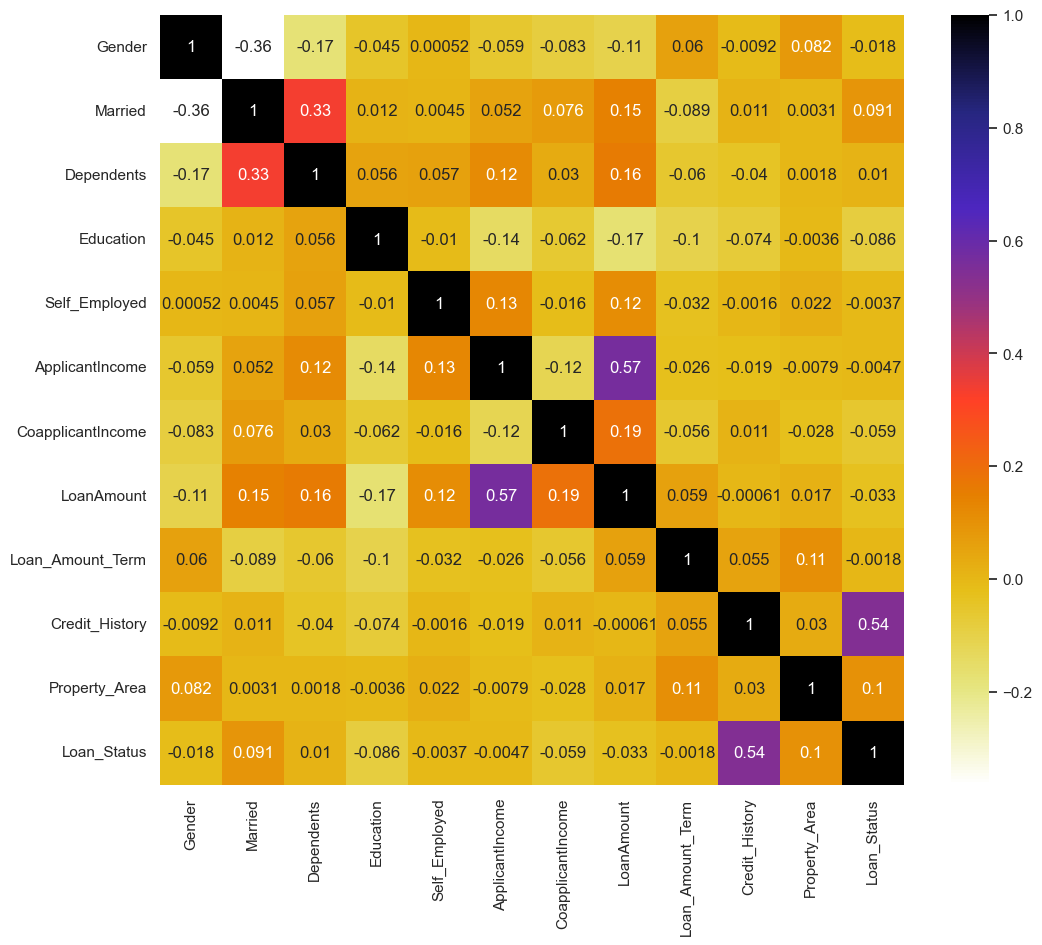

In [98]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_copy.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [99]:
X=df_copy.drop(labels=['Loan_Status'], axis=1)
y=df_copy['Loan_Status']

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [105]:
X_train.shape

(429, 11)

In [106]:
X_test.shape

(185, 11)

In [107]:
y_train.shape

(429,)

In [108]:
y_test.shape

(185,)

In [109]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [110]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,X.columns)
])


In [111]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
modal= LogisticRegression()
modal.fit(X_train,y_train)

LogisticRegression()

In [114]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [115]:
y_pred2 = modal.predict(X_test)
print(confusion_matrix(y_test,y_pred2),'confusion_matrix')
print(accuracy_score(y_test,y_pred2),'accuracy_score')
print(classification_report(y_test,y_pred2),'classification_report')

[[ 18  36]
 [  3 128]] confusion_matrix
0.7891891891891892 accuracy_score
              precision    recall  f1-score   support

           0       0.86      0.33      0.48        54
           1       0.78      0.98      0.87       131

    accuracy                           0.79       185
   macro avg       0.82      0.66      0.67       185
weighted avg       0.80      0.79      0.75       185
 classification_report


In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
models = {
    "LogisticRegression": LogisticRegression(),
    'RandomForest':RandomForestClassifier(max_depth=4, random_state=0,oob_score=True),
    "DecisionTree":DecisionTreeClassifier(),
    "svc": LinearSVC()
}
trained_model_list=[]
model_list=[]
accuracy_score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print(accuracy_score(y_test,y_pred2),'accuracy_score')
    accuracy_score_list.append(accuracy_score(y_test,y_pred2))

    print('Model Training Performance')
    print('training accuracy',model.score(X_train,y_train))
    
    print('='*35)
    print('\n')

LogisticRegression
0.7891891891891892 accuracy_score
Model Training Performance
training accuracy 0.8181818181818182


RandomForest
0.7891891891891892 accuracy_score
Model Training Performance
training accuracy 0.8228438228438228


DecisionTree
0.7891891891891892 accuracy_score
Model Training Performance
training accuracy 1.0


svc
0.7891891891891892 accuracy_score
Model Training Performance
training accuracy 0.8205128205128205




c:\Users\himanshu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [118]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [119]:
X_test

,num_pipeline__Gender,num_pipeline__Married,num_pipeline__Dependents,num_pipeline__Education,num_pipeline__Self_Employed,num_pipeline__ApplicantIncome,num_pipeline__CoapplicantIncome,num_pipeline__LoanAmount,num_pipeline__Loan_Amount_Term,num_pipeline__Credit_History,num_pipeline__Property_Area
0,2.072751,0.725734,-0.740499,1.887811,2.784798,0.290192,-0.523599,-0.092954,0.285278,0.437798,-0.035845
1,-0.482451,0.725734,-0.740499,-0.529714,-0.359092,0.158446,0.948438,1.354742,0.285278,0.437798,1.147029
2,-0.482451,0.725734,-0.740499,-0.529714,-0.359092,0.484309,-0.523599,0.170263,0.285278,0.437798,1.147029
3,-0.482451,0.725734,1.244964,1.887811,2.784798,-0.567542,0.078642,-0.583496,0.285278,0.437798,1.147029
4,2.072751,-1.377915,-0.740499,-0.529714,-0.359092,-0.370330,-0.523599,-0.308314,0.285278,0.437798,1.147029
...,...,...,...,...,...,...,...,...,...,...,...
180,-0.482451,-1.377915,-0.740499,1.887811,2.784798,0.071646,-0.523599,-0.164741,0.285278,0.437798,1.147029
181,-0.482451,0.725734,0.252232,-0.529714,2.784798,0.395230,-0.523599,1.127418,0.285278,0.437798,-1.218718
182,-0.482451,0.725734,-0.740499,-0.529714,-0.359092,2.340153,1.167814,5.075682,0.285278,0.437798,-0.035845
183,-0.482451,-1.377915,2.237695,-0.529714,-0.359092,0.619964,-0.523599,0.469374,0.285278,0.437798,-0.035845
